# Klasifikasi Gambar Menggunakan EfficientNetV2M untuk Restoran

Notebook ini berisi Proyek Capstone [Ghora Laziola](https://www.linkedin.com/in/ghora-laziola-8803581a1/) tentang klasifikasi gambar untuk restoran. Dalam proyek ini, kita akan menggunakan data yang telah dilatih menggunakan EfficientNetV2M. Model ini terdiri dari 1000 label yang sudah dilatih. Kita akan memanfaatkan layanan IBM seperti Watson Studio dan Watson Cloud Storage. Untuk prosesnya, kita akan menggunakan Jupyter Notebook dan pustaka Keras. Pelatihan model tidak diperlukan di sini, sehingga prosesnya menjadi lebih cepat.

![Poster Kalsifikasi Gambar Resto.jpg](https://raw.githubusercontent.com/arqualian/image-classification-Capstone-Project/a2a8852c814032079262df2163bda936e861b097/Poster%20Kalsifikasi%20Gambar%20Resto.jpg)

Dalam notebook ini, kita akan menggunakan pustaka Keras untuk mengklasifikasikan gambar-gambar yang dipilih secara acak dari internet. Keras menyederhanakan proses perancangan dan pelatihan model deep learning dengan menyediakan antarmuka tingkat tinggi. Gambar-gambar dari internet akan diambil menggunakan link URL dan diunduh oleh program ini.

Dalam proyek ini, kita akan menerapkan metode transfer learning. Transfer learning adalah teknik yang memanfaatkan pengetahuan yang diperoleh dari model yang sudah dilatih sebelumnya pada tugas sebelumnya untuk mengklasifikasikan gambar-gambar baru. Pendekatan ini membantu mengurangi waktu dan sumber daya yang dibutuhkan untuk melatih model dari awal. Kita akan menggunakan model EfficientNetV2M yang sudah dilatih sebelumnya untuk tujuan ini.

Dalam notebook ini, kita akan :
1. Menggunakan model EfficientNetV2M untuk klasifikasi
2. mengimport Liberary yang dibutuhkan 
3. Menggunakan link urls gambar yang berkaitan dengan restoran agar di klasifikasi
4. Mengunduh gambar dari link urls dan merubahnya ke num array
5. preproses data menggunakan model EfficientNetV2M 
6. Menampilkan hasil prediksi

## 1. Image Classification using EfficientNetV2 Model and ImageNet Labels

- Pada blok kode ini, kita mengimpor modul json untuk membaca file JSON dan mengimpor model [EfficientNetV2M](https://keras.io/api/keras_cv/models/efficientnetv2/) dari keras.applications.efficientnet_v2 untuk digunakan dalam tugas klasifikasi gambar.
- Kemudian, kita juga mengimpor model MobileNetV2 sebagai pilihan alternatif yang dapat digunakan.
- Model yang akan digunakan diinisialisasi sebagai EfficientNetV2M dan ditugaskan ke variabel model.
- Selanjutnya, kita menggunakan metode summary() untuk menampilkan lapisan-lapisan model yang ada dalam EfficientNetV2M. Metode ini memberikan ringkasan struktural dari model tersebut, termasuk jumlah parameter dan ukuran keluaran dari setiap lapisan.
- Selanjutnya, kita membaca file [JSON](https://github.com/anishathalye/imagenet-simple-labels/blob/1a7c0a962e632880e85d48329b06d7848ac20e6d/imagenet-simple-labels.json) dengan nama imagenet-simple-labels.json yang berisi label-label dari dataset ImageNet.
- Label-label yang terkait dengan model kemudian ditampilkan menggunakan perulangan for untuk mencetak indeks dan label-labelnya.
- Sebagai catatan, komentar pada dua baris terakhir yang memuat perulangan for dan cetakan dapat diaktifkan dengan menghapus tanda pagar (#) di awal baris tersebut.

In [1]:
import json
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

# Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

# Tampilkan layer-layer model VGG16
model.summary()

# Baca file imagenet-simple-labels.json
with open('imagenet-simple-labels.json') as f:
    labels = json.load(f)

# Tampilkan label-label yang terkait dengan model
#for idx, label in enumerate(labels):
 #   print(f"{idx}: {label}")


Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

## 2. Image Classification Setup and Label Loading

### 2.1 Penjelasan 
- Pada blok kode ini, beberapa library diimpor untuk melakukan tugas-tugas terkait klasifikasi gambar.
- Library requests digunakan untuk mengambil gambar dari URL, numpy untuk manipulasi array, matplotlib.pyplot untuk menampilkan gambar, cv2 (OpenCV) untuk manipulasi gambar, pandas untuk manipulasi data tabular, PIL.Image untuk memproses gambar, json untuk membaca file JSON, dan IPython.display untuk menampilkan gambar dalam notebook.
- Selanjutnya, kita mengimpor preprocess_input dari keras.applications.efficientnet_v2 untuk melakukan pra-pemrosesan gambar sebelum digunakan sebagai input untuk model.
- Kemudian, file JSON dengan nama imagenet-simple-labels.json yang berisi label-label dari dataset ImageNet dibaca dan dimuat ke dalam variabel labels.

### 2.2 Fungsi
Blok kode ini bertanggung jawab atas setup awal dan pemuatan label-label yang diperlukan untuk tugas klasifikasi gambar berikutnya.

In [2]:
# Import Library and Load JSON Labels
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
import json
import IPython.display as display
from keras.applications.efficientnet_v2 import preprocess_input

# Load JSON labels

with open('imagenet-simple-labels.json') as f:
    labels = json.load(f)

## 3. Image URL Collection for Classification

### 3.1 Penjelasan 
- Pada blok kode ini, kita membuat sebuah list yang diberi nama urls untuk menyimpan beberapa URL gambar.
- URL gambar-gambar tersebut ditambahkan ke dalam list menggunakan metode append().
- Setiap URL merepresentasikan sebuah gambar yang akan digunakan untuk tugas klasifikasi gambar selanjutnya.

### 3.2 Fungsi
Blok kode ini bertanggung jawab atas mengumpulkan kumpulan URL gambar yang akan digunakan dalam tugas klasifikasi gambar berikutnya. URL-URL ini nantinya akan digunakan untuk mengambil gambar-gambar tersebut dan melakukan prediksi menggunakan model yang telah disiapkan sebelumnya.

In [3]:
urls = []
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXsgWcYV3wVw1uBtBmP3YwhWmEZKToKEHgvQ&usqp=CAU")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7IIJwd5Dfds2_CNcj_foA5HvqbWR8DB58Mg&usqp=CAU")
urls.append("https://cdn01.indozone.id/local/5eb6eb73b56be.jpg")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTItm-SFxyMzuO7_qujn3tktEQG_RUJGYR6ig&usqp=CAU")
urls.append("https://apollo-singapore.akamaized.net/v1/files/86uck6rxozur1-ID/image")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGhhXDzQ8XYlM6Tm5TU9EzU1UXyrGsJ6UvXw&usqp=CAU")


## 4. Downloading and Displaying Images for Classification

### 4.1 Penjelasan 
- Pada blok kode ini, kita membuat sebuah list dengan nama imgs untuk menyimpan gambar-gambar yang akan diunduh.
- Kemudian, kita menentukan ukuran gambar dengan menggunakan plt.figure(figsize=(15, 6)). Ini akan mempengaruhi tampilan plot gambar-gambar yang akan ditampilkan nantinya.
- Selanjutnya, kita menggunakan perulangan for untuk mengiterasi melalui setiap URL dalam list urls.
- Pada setiap iterasi, kita melakukan permintaan (request) dengan menggunakan requests.get(urls[u], stream=True) untuk mengunduh gambar dari URL yang diberikan.
- Gambar yang diunduh dikonversi menjadi array numpy menggunakan np.array(Image.open(r.raw)).
- Selanjutnya, kita menggunakan plt.subplot(1, len(urls), u+1) untuk mengatur letak gambar dalam plot sesuai dengan jumlah URL yang ada.
- Gambar yang diunduh kemudian ditampilkan menggunakan plt.imshow(img).
- Gambar juga diubah ukurannya menjadi 480x480 piksel menggunakan cv2.resize(img, (480, 480)) dan ditambahkan ke dalam list imgs.
- Setelah semua gambar ditampilkan, plt.show() digunakan untuk menampilkan plot gambar-gambar tersebut.
- Terakhir, list imgs diubah menjadi array numpy menggunakan np.array(imgs), sehingga dapat digunakan dalam tugas klasifikasi gambar berikutnya.

### 4.2 Fungsi 
Blok kode ini bertanggung jawab atas mengunduh gambar-gambar dari URL yang telah dikumpulkan sebelumnya dan menampilkannya dalam bentuk plot, sehingga kita dapat melihat gambar-gambar yang akan digunakan untuk melakukan klasifikasi.

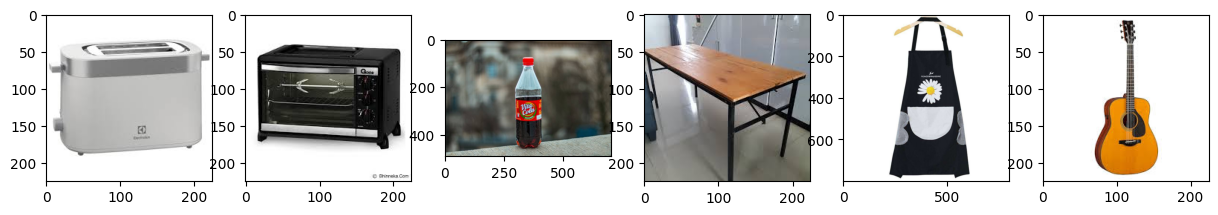

In [4]:
#Download and show pictures 
imgs = []
plt.figure(figsize=(15, 6))

for u in range(0, len(urls)):
    r = requests.get(urls[u], stream=True)  # Download
    img = np.array(Image.open(r.raw))  # Convert to numpy array
    plt.subplot(1, len(urls), u+1)
    plt.imshow(img)
    img = cv2.resize(img, (480, 480))
    imgs.append(img)

plt.show()
imgs = np.array(imgs)


## 5. Image Preprocessing and Prediction using EfficientNetV2-M Model

### 5.1 Penjelasan 
- Pada blok kode ini, kita melakukan pra-pemrosesan gambar dan melakukan prediksi menggunakan model EfficientNetV2-M yang telah diinisialisasi sebelumnya.
- Gambar-gambar dalam imgs diolah sebelum digunakan sebagai input untuk model dengan menggunakan preprocess_input(imgs). Ini adalah langkah penting dalam mempersiapkan gambar agar sesuai dengan prapemrosesan yang dilakukan pada model EfficientNetV2-M.
- Setelah gambar-gambar diolah, kita menggunakan model model.predict(imgs) untuk melakukan prediksi pada gambar-gambar tersebut.
- Pada setiap iterasi for, kita menggunakan np.argmax(yh[i]) untuk mendapatkan indeks label dengan probabilitas tertinggi dari hasil prediksi.
- Indeks label digunakan untuk mengambil label yang sesuai dari labels dan disimpan dalam variabel label.
- Terakhir, kita mencetak URL gambar beserta label hasil prediksi menggunakan print(f"{urls[i]}: {label}").

### 5.2 Fungsi 
Blok kode ini bertanggung jawab atas pra-pemrosesan gambar dan melakukan prediksi menggunakan model EfficientNetV2-M. Hasil prediksi ini kemudian dicetak, menunjukkan URL gambar beserta label hasil prediksi untuk setiap gambar.

In [5]:
# Preprocess images for EfficientNetV2-M - Do Presiction
imgs = preprocess_input(imgs)

yh = model.predict(imgs)

for i in range(len(urls)):
    label_index = np.argmax(yh[i])
    label = labels[label_index]
    print(f"{urls[i]}: {label}")


1/1 [==============================] - 15s 15s/step
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXsgWcYV3wVw1uBtBmP3YwhWmEZKToKEHgvQ&usqp=CAU: toaster
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7IIJwd5Dfds2_CNcj_foA5HvqbWR8DB58Mg&usqp=CAU: rotisserie
https://cdn01.indozone.id/local/5eb6eb73b56be.jpg: soda bottle
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTItm-SFxyMzuO7_qujn3tktEQG_RUJGYR6ig&usqp=CAU: dining table
https://apollo-singapore.akamaized.net/v1/files/86uck6rxozur1-ID/image: apron
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGhhXDzQ8XYlM6Tm5TU9EzU1UXyrGsJ6UvXw&usqp=CAU: acoustic guitar


## 6. Displaying Predicted Labels with Images

### 6.1 Penjelasan 
- Pada blok kode ini, kita membuat plot untuk menampilkan gambar-gambar beserta label-label hasil prediksi.
- plt.figure(figsize=(15, 6)) digunakan untuk mengatur ukuran plot.
- Selanjutnya, menggunakan perulangan for, kita iterasi melalui setiap gambar dan label hasil prediksi.
- Pada setiap iterasi, np.argmax(yh[i]) digunakan untuk mendapatkan indeks label dengan probabilitas tertinggi dari hasil prediksi.
- Indeks label tersebut digunakan untuk mengambil label yang sesuai dari labels dan disimpan dalam variabel label.
- Kemudian, plt.subplot(2, 3, i+1) digunakan untuk mengatur letak gambar dan label dalam plot. Anda dapat mengubah angka 2 dan 3 untuk mengatur tata letak grid plot sesuai dengan jumlah gambar yang ingin ditampilkan.

### 6.2 Fungsi 
Blok kode ini bertanggung jawab atas menampilkan gambar-gambar beserta label-label hasil prediksi dalam bentuk plot. Ini memudahkan kita untuk melihat hasil prediksi secara visual.

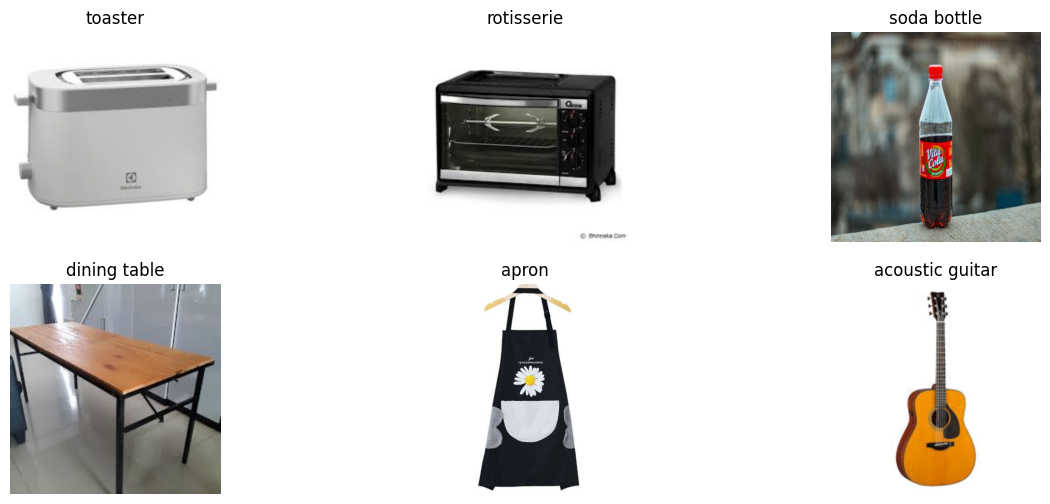

In [6]:
plt.figure(figsize=(15, 6))
for i in range(len(urls)):
    label_index = np.argmax(yh[i])
    label = labels[label_index]
    plt.subplot(2, 3, i+1)  # Ubah nilai 2 dan 3 untuk mengatur grid plot
    plt.imshow(imgs[i])
    plt.title(label)
    plt.axis('off')
plt.show()
